UB Bern Digital Toolbox  
2020  
Author: Michael Horn

# Basic Data Visualization Procedures

In this Notebook we will present some basic methods to visualize data.

Libraries required:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## 1. Visualization of data generated by mathematical functions

First, we will generate some data by defining a mathematical function. As an example, lest`s take a polynomial function like f(x) = 2x<sup>3</sup> + x<sup>2</sup> + 3x + 5.

In [2]:
# The function "polynom" takes a list of x-values as input and returns a list of y-values as output.
def polynom(list_x_values):
    list_y_values = []
    for x_value in list_x_values:
        y_value = 2* x_value**3 + x_value**2 + 3*x_value + 5
        list_y_values.append(y_value)
    return list_y_values

In [3]:
# We generate a list of x-values by starting with an empty list and gradually adding integer values from -10 to 10.
list_x_values = []

for number in range (-10, 11):
    list_x_values.append(number)

In [4]:
print(list_x_values)

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


Now we apply the function "polynom" to the list of x-values we just generated.

In [5]:
list_y_values = polynom(list_x_values)

The result is a list of corresponding y-values:

In [6]:
print(list_y_values)

[-1925, -1399, -979, -653, -409, -235, -119, -49, -13, 1, 5, 11, 31, 77, 161, 295, 491, 761, 1117, 1571, 2135]


With **matplotlib** we can visualize the data saved in the two lists. By default we obtain the following scatter-plot, which shows the locations of the data points.

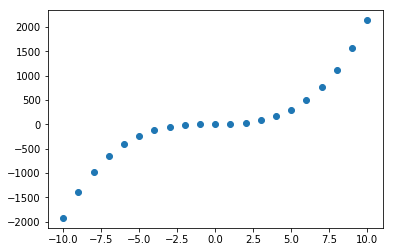

In [7]:
plt.scatter(list_x_values, list_y_values)
plt.show()

An alternative is to plot a line instead of showing the points:

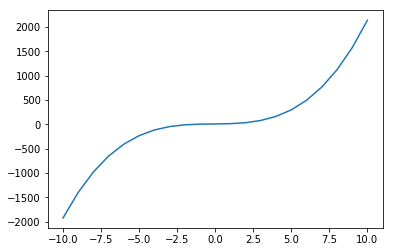

In [8]:
plt.plot(list_x_values, list_y_values)
plt.show()

We can plot the two diagrams next to each other in a figure:

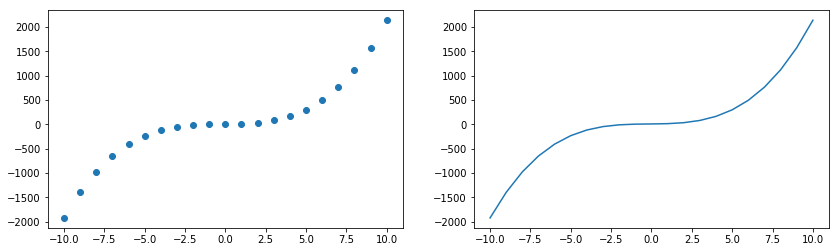

In [9]:
plt.figure(figsize = (14,4))
plt.subplot(1,2,1)
plt.scatter(list_x_values, list_y_values)
           
plt.subplot(1,2,2)
plt.plot(list_x_values, list_y_values)

plt.show()

The default representation of the data is ok, but one can generate much nicer plots. Let's do that by changing some parameters for the line-plot:

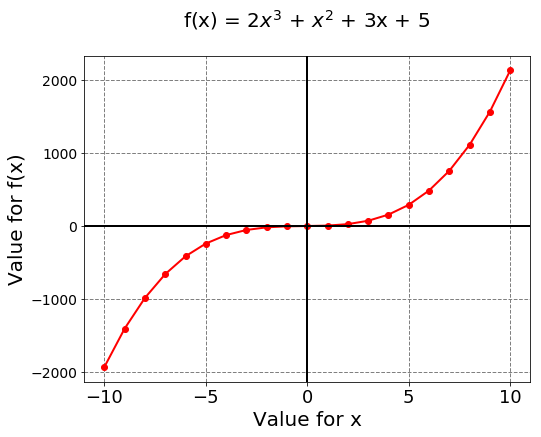

In [10]:
# Defines the size of the figure:
plt.figure(figsize = (8,6))

# Defines the plot-type, in this case a line-plot. Takes the data to be plotted. "Linewith" defines the thickness of 
# the plotted line, "color" the line-colour, "marker" adds additional marks to the plot and "markevery" defines the 
# locations of these markers. 
# In our case, we mimick a mixture of a line-plot and a scatter-plot by setting marker at the places, where our data points 
# are located.
plt.plot(list_x_values, list_y_values, linewidth = 2, color="red", marker="o", markevery=1)

# A diagram should have a title, so we give it one:
plt.title("f(x) = 2$x^3$ + $x^2$ + 3x + 5 \n", fontsize=20, color="black")

# The x- and y-axes should be labelled, so we label them:
plt.xlabel("Value for x", fontsize=20)
plt.ylabel("Value for f(x)", fontsize=20)

# We can specify, which values to show on the x- and y-axes. This we do by defining the "ticks" and including some parameters
# for their appearance.
plt.xticks([-10, -5, 0, 5, 10])
plt.yticks([-2000, -1000, 0, 1000, 2000])
plt.tick_params(axis="x", labelsize=18)
plt.tick_params(axis="y", labelsize=14)

# Gridlines can facilitate data interpretation. We include them at the positions of the ticks and define their appearance.
plt.grid(True, color="gray", linestyle="--", linewidth=1)

# In the default data-representation, the x=0 and y=0 axes were not shown. We include these axes in our diagram 
plt.axhline(y=0, linewidth=2, color="black")
plt.axvline(x=0, linewidth=2, color="black")

plt.show()

Let`s add some additional data to our figure. We define a second function, let's say f(x) = - (2x<sup>3</sup> + x<sup>2</sup> + 3x + 5) and generate the according list of y-values.  

In [11]:
def neg_polynom(list_x_values):
    list_y_values = []
    for x_value in list_x_values:
        y_value = - (2* x_value**3 + x_value**2 + 3*x_value + 5)
        list_y_values.append(y_value)
    return list_y_values

In [12]:
neg_y_values = neg_polynom(list_x_values)
print(neg_y_values)

[1925, 1399, 979, 653, 409, 235, 119, 49, 13, -1, -5, -11, -31, -77, -161, -295, -491, -761, -1117, -1571, -2135]


We plot both data sets to the same figure and label them accordingly.

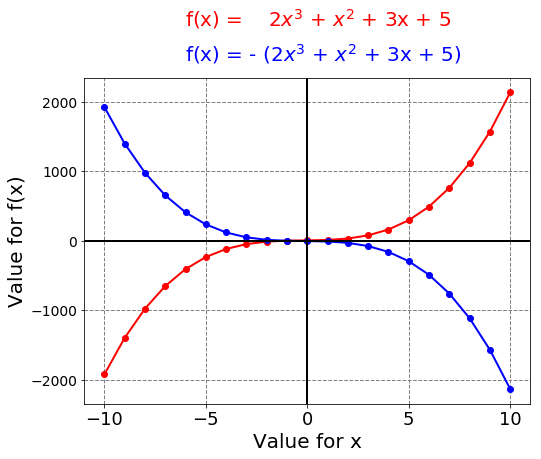

In [13]:
# Defines the size of the figure:
plt.figure(figsize = (8,6))

# Defines the plot-type, in this case a line-plot. Takes the data to be plotted. "Linewith" defines the thickness of 
# the plotted line, "color" the line-colour, "marker" adds additional marks to the plot and "markevery" defines the 
# locations of these markers. 
# In our case, we mimick a mixture of a line-plot and a scatter-plot by setting marker at the places, where our data points 
# are located.
plt.plot(list_x_values, list_y_values, linewidth = 2, color="red", marker="o", markevery=1)

plt.plot(list_x_values, neg_y_values, linewidth = 2, color="blue", marker="o", markevery=1)

# For a title with multiple colours wie use the method "figtext". The numbers in front of each text string represent the x- and
# y-coordinates for the position of each text string
plt.figtext(0.3, 1, "f(x) =    2$x^3$ + $x^2$ + 3x + 5", fontsize=20, color="red") 
plt.figtext(0.3, 0.92, "f(x) = - (2$x^3$ + $x^2$ + 3x + 5)", fontsize=20, color="blue")

# The x- and y-axes should be labelled, so we label them:
plt.xlabel("Value for x", fontsize=20)
plt.ylabel("Value for f(x)", fontsize=20)

# We can specify, which values to show an the x- and y-axes. This we do by defining the "ticks" and including some parameters
# for their appearance.
plt.xticks([-10, -5, 0, 5, 10])
plt.yticks([-2000, -1000, 0, 1000, 2000])
plt.tick_params(axis="x", labelsize=18)
plt.tick_params(axis="y", labelsize=14)

# Gridlines can facilitate data interpretation. We include them at the positions of the ticks and define their appearance.
plt.grid(True, color="gray", linestyle="--", linewidth=1)

# In the default data-representation, the x=0 and y=0 axes were not shown. We include these achses in our diagram 
plt.axhline(y=0, linewidth=2, color="black")
plt.axvline(x=0, linewidth=2, color="black")

plt.show()

## 2.Visualization of data sets with several attributes 

The iris-dataset (that you can download here: https://archive.ics.uci.edu/ml/datasets/Iris and then save as .csv-file) is ideal for showing basic data visualization techniques for data with several attributes.

Let's first have a look at the data set using the Python-library **pandas**.

From the documentation at the UCI-site, from where we obtained the data, we know that the iris-dataset has 150 data points with
4 attributes and 1 class each. We know the names of the attributes, so we can generate a pandas dataframe and look at the data in a table-like shape: 

In [14]:
# We read the iris-dataset from the .csv-file, define a pandas-dataframe and retrieve information about data size and shape:
dataframe = pd.read_csv('iris_dataset.csv',names=['sepal_length (cm)','sepal_width (cm)',
                                                  'petal_length (cm)','petal_width (cm)','species'])
dataframe.head(n=5)

,sepal_length (cm),sepal_width (cm),petal_length (cm),petal_width (cm),species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Now we can perform different types of data visualization for this data set.

Let's first perform a set of scatter plots, which visualize the data of two columns each:  
- sepal_length and sepal width
- sepal_length and petal_length
- sepal_lenght and petal_width
- sepal_width and petal_length
- sepal_width and petal_width
- petal_length and petal_width

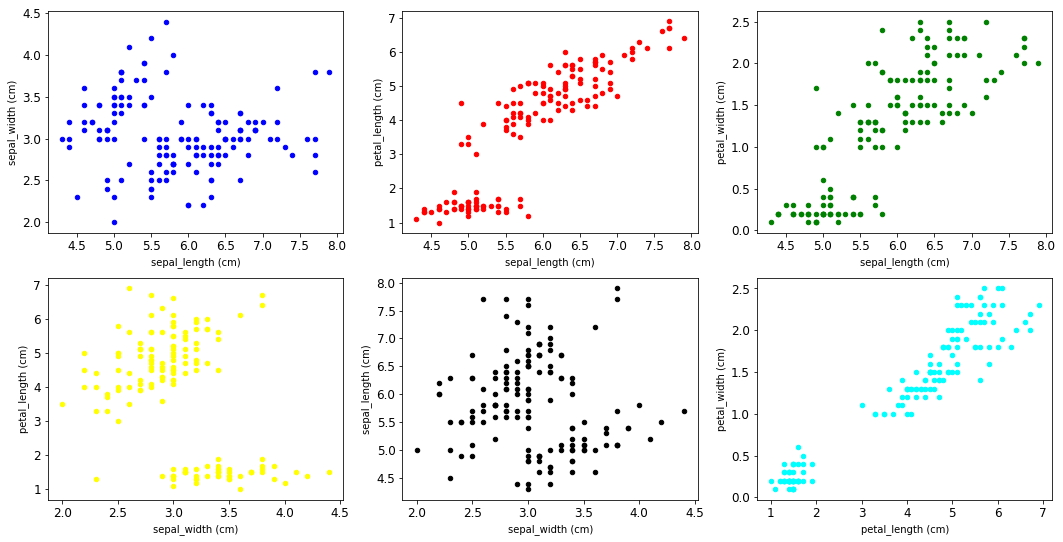

In [15]:
fig, axes = plt.subplots(figsize=(18,9), nrows=2, ncols=3)

dataframe.plot(ax=axes[0,0], x="sepal_length (cm)", y="sepal_width (cm)", kind="scatter", color='blue', fontsize=12)

dataframe.plot(ax=axes[0,1], x="sepal_length (cm)", y="petal_length (cm)", kind="scatter", color='red', fontsize=12)

dataframe.plot(ax=axes[0,2], x="sepal_length (cm)", y="petal_width (cm)", kind="scatter", color='green', fontsize=12)

dataframe.plot(ax=axes[1,0], x="sepal_width (cm)", y="petal_length (cm)", kind="scatter", color='yellow', fontsize=12)

dataframe.plot(ax=axes[1,1], x="sepal_width (cm)", y="sepal_length (cm)", kind="scatter", color='black', fontsize=12)

dataframe.plot(ax=axes[1,2], x="petal_length (cm)", y="petal_width (cm)", kind="scatter", color='cyan', fontsize=12)

plt.show()

The scatter-blots show that in some cases there is a very nice separation of the data points. It would be interesting to know, whether this separation is due to the different iris-species. Therefore, we label the data in one of the scatter-plots according to the iris-species.

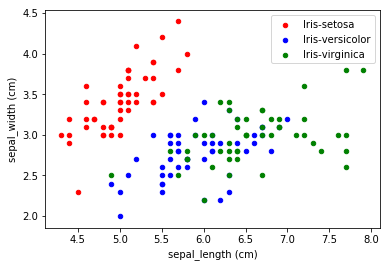

In [16]:
fig, ax = plt.subplots()

colors = {'Iris-setosa':'red', 'Iris-versicolor':'blue', 'Iris-virginica':'green'}

grouped = dataframe.groupby('species')

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x="sepal_length (cm)", y="sepal_width (cm)", label=key, color=colors[key])
    
plt.show()

The library **seaborn** is a very handy tool for the parallel visualization of different attributes of a data set:

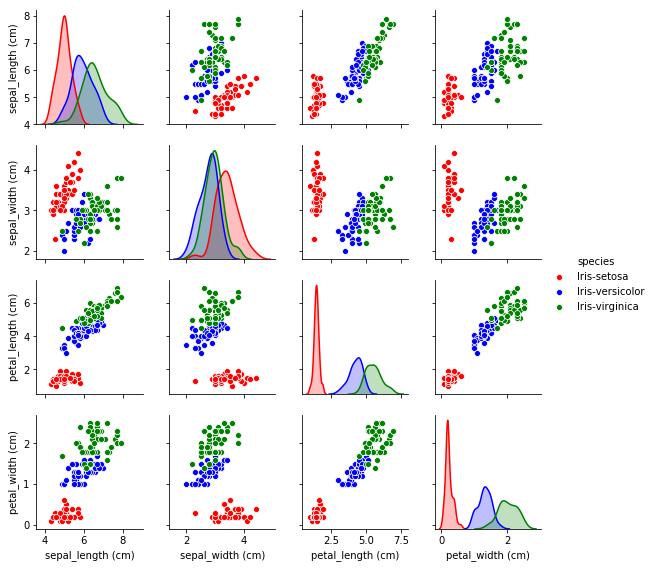

In [17]:
sns.pairplot(dataframe, hue="species", palette={'Iris-setosa':'red', 'Iris-versicolor':'blue', 'Iris-virginica':'green'},
            height=2)
plt.show()